In [72]:
import pandas as pd
import bokeh as bk
import seaborn as sbn
import matplotlib.pyplot as plt

%matplotlib inline
sbn.set(rc={'figure.figsize':(11.7,8.27)})

In [45]:
df = pd.read_excel("DATASET_DESEMPENHO_RENDIMENTO_UFF_FORMADOS_2013-2016.xlsx")

In [46]:
df.head(21)

,ALUNO,CR,PERIODO,CURSO,LOCALIDADE
0,100000126373,8.80,20131,CIÊNCIAS CONTÁBEIS,NITERÓI
1,100000126373,8.30,20132,CIÊNCIAS CONTÁBEIS,NITERÓI
2,100000126373,8.40,20141,CIÊNCIAS CONTÁBEIS,NITERÓI
3,100000126373,8.50,20142,CIÊNCIAS CONTÁBEIS,NITERÓI
4,100000126373,8.60,20151,CIÊNCIAS CONTÁBEIS,NITERÓI
5,100000126373,7.70,20152,CIÊNCIAS CONTÁBEIS,NITERÓI
6,100000126373,8.90,20161,CIÊNCIAS CONTÁBEIS,NITERÓI
7,100000126373,8.50,20162,CIÊNCIAS CONTÁBEIS,NITERÓI
8,100000126375,9.82,20131,CIÊNCIAS CONTÁBEIS,NITERÓI
9,100000126375,9.12,20132,CIÊNCIAS CONTÁBEIS,NITERÓI


In [62]:
dfAdm = df[df.CURSO == 'ADMINISTRAÇÃO']
dfAdm.head()

,ALUNO,CR,PERIODO,CURSO,LOCALIDADE
94,100000126423,8.0,20131,ADMINISTRAÇÃO,NITERÓI
95,100000126423,7.4,20132,ADMINISTRAÇÃO,NITERÓI
96,100000126423,8.8,20141,ADMINISTRAÇÃO,NITERÓI
97,100000126423,8.6,20142,ADMINISTRAÇÃO,NITERÓI
98,100000126423,7.5,20151,ADMINISTRAÇÃO,NITERÓI


In [58]:
dfContabeis = df[df.CURSO == 'CIÊNCIAS CONTÁBEIS']
dfContabeis.head()

,ALUNO,CR,PERIODO,CURSO,LOCALIDADE
0,100000126373,8.8,20131,CIÊNCIAS CONTÁBEIS,NITERÓI
1,100000126373,8.3,20132,CIÊNCIAS CONTÁBEIS,NITERÓI
2,100000126373,8.4,20141,CIÊNCIAS CONTÁBEIS,NITERÓI
3,100000126373,8.5,20142,CIÊNCIAS CONTÁBEIS,NITERÓI
4,100000126373,8.6,20151,CIÊNCIAS CONTÁBEIS,NITERÓI


In [47]:
print(df.CR.describe())

count    680.000000
mean       8.074559
std        0.871567
min        5.000000
25%        7.577500
50%        8.130000
75%        8.700000
max       10.000000
Name: CR, dtype: float64


In [48]:
print(df.PERIODO.describe())

count      680.000000
mean     20147.398529
std         10.649801
min      20131.000000
25%      20141.000000
50%      20151.000000
75%      20161.000000
max      20162.000000
Name: PERIODO, dtype: float64


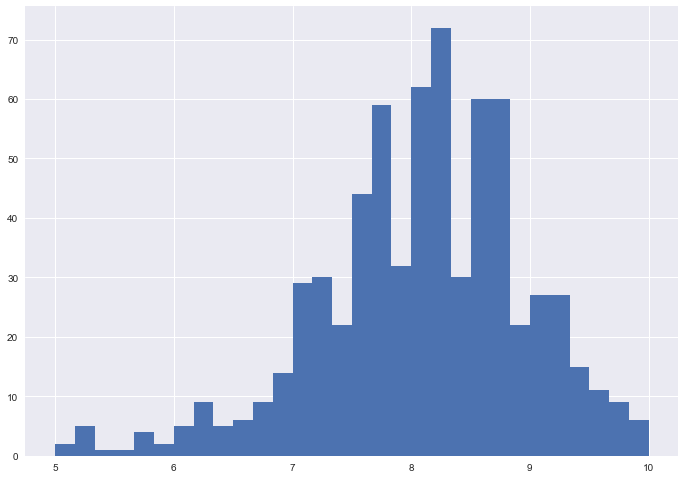

In [73]:
df.CR.hist(bins = 30);

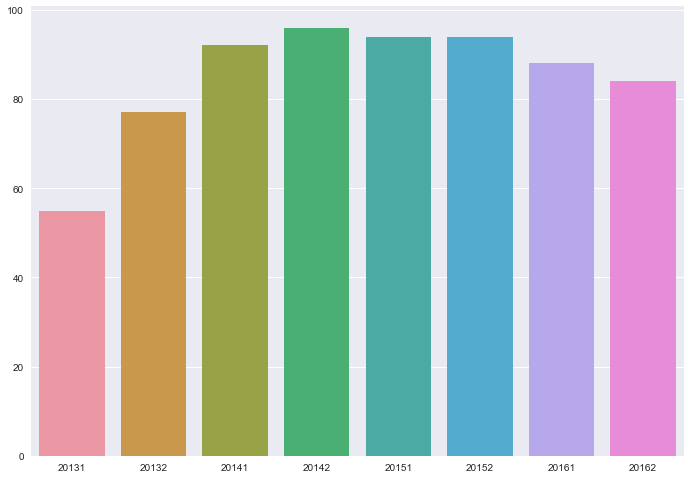

In [74]:
x,y = np.unique(df.PERIODO ,return_counts=True)
sbn.barplot( x=x, y=y)

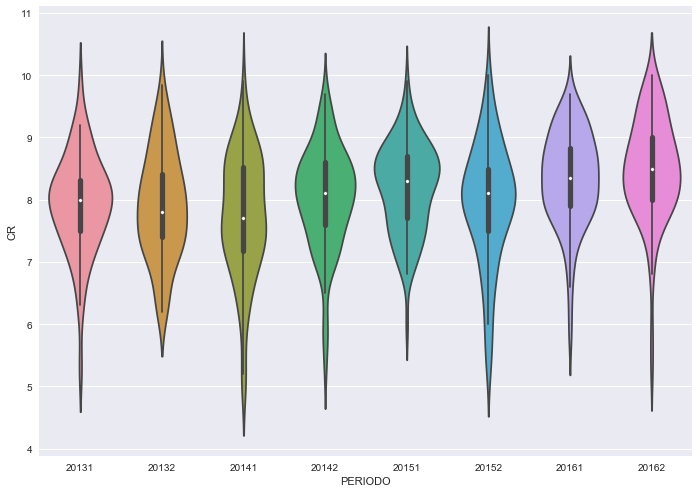

In [75]:
#scatter(df.PERIODO, df.CR, s=10, c='gray', marker='x', data=df);


# X representa os períodos e o Y
sbn.violinplot(df.PERIODO, df.CR)

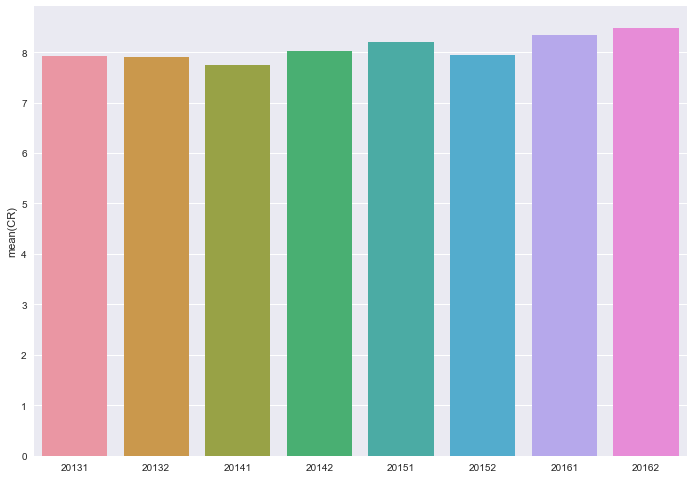

In [76]:
X,y = np.unique(df.PERIODO ,return_counts=True)
Y = df.groupby(['PERIODO'])['CR'].mean()
#print(y)
sbn.barplot(X, Y)

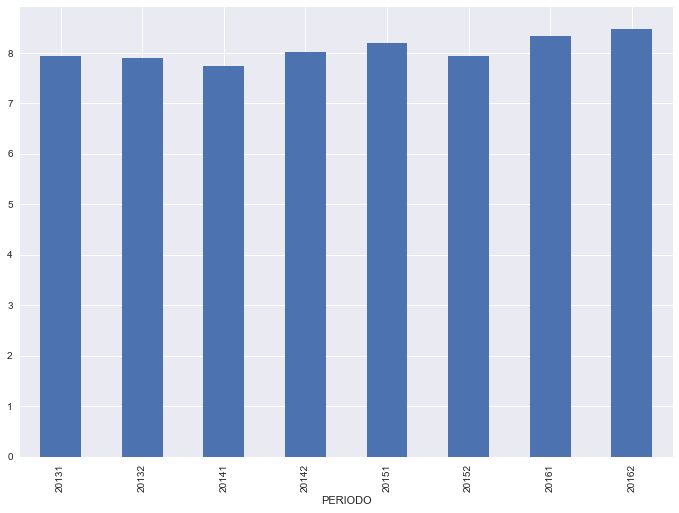

In [77]:
df.groupby(['PERIODO'])['CR'].mean().plot.bar()

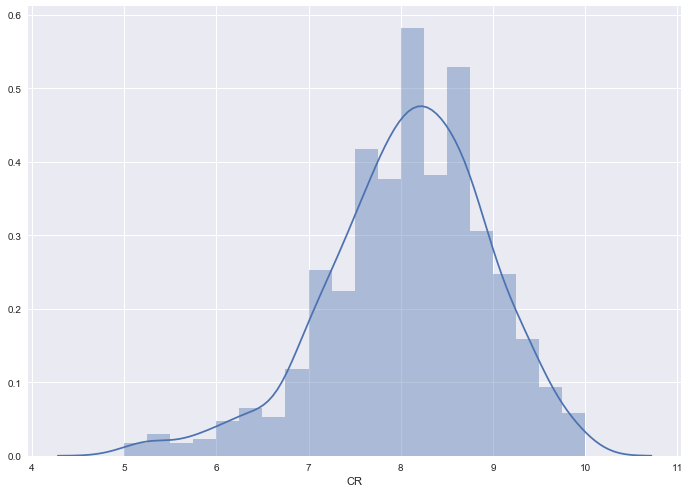

In [78]:
sbn.distplot(df.CR, hist=True,bins=20);

In [60]:
# Gráfico já melhor feito acima com o sbn.barplot

#sbn.distplot(df.PERIODO, kde=False, hist=True, bins=10);

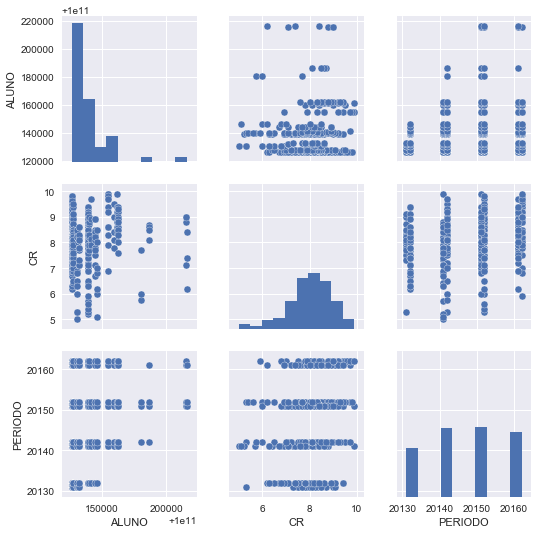

In [79]:
sbn.pairplot(dfAdm)

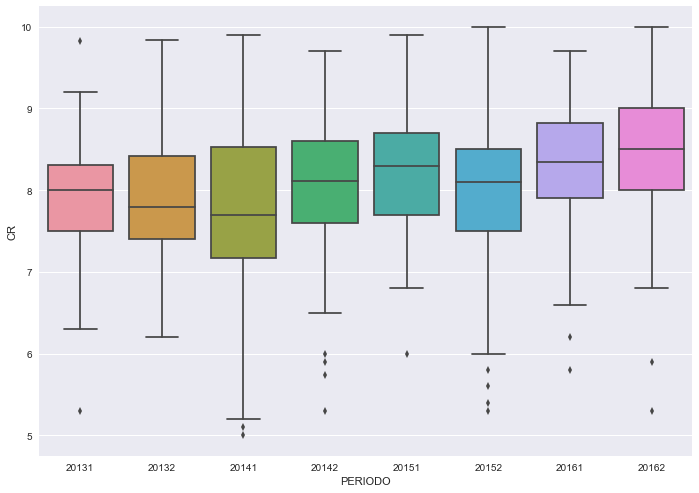

In [80]:
sbn.boxplot(df.PERIODO, df.CR)

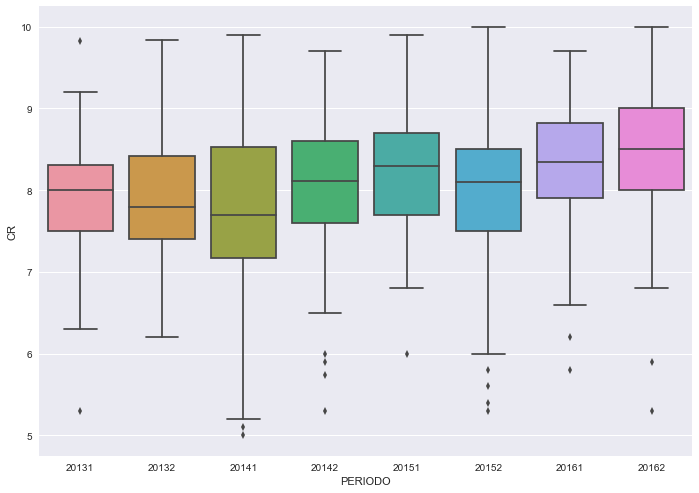

In [93]:
sbn.boxplot(df.PERIODO, df.CR)

In [95]:
# Como listar essa informação por status de reject
# Comparação de médias: Teste de Turking
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df.CR, df.PERIODO))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
20131  20132  -0.0254  -0.4786 0.4278 False 
20131  20141   -0.189  -0.6266 0.2486 False 
20131  20142   0.0949  -0.3393 0.529  False 
20131  20151   0.2693  -0.1666 0.7051 False 
20131  20152   0.0118   -0.424 0.4477 False 
20131  20161    0.4    -0.0413 0.8412 False 
20131  20162   0.5526   0.1073 0.9979  True 
20132  20141  -0.1636  -0.5601 0.2329 False 
20132  20142   0.1203  -0.2724 0.513  False 
20132  20151   0.2947  -0.0999 0.6893 False 
20132  20152   0.0372  -0.3574 0.4318 False 
20132  20161   0.4254   0.0247 0.826   True 
20132  20162   0.578    0.173  0.983   True 
20141  20142   0.2839  -0.0907 0.6584 False 
20141  20151   0.4583   0.0818 0.8348  True 
20141  20152   0.2008  -0.1757 0.5773 False 
20141  20161   0.5889   0.2061 0.9717  True 
20141  20162   0.7416   0.3542 1.129   True 
20142  20151   0.1744  -0.1981 0.5469 False 
2014

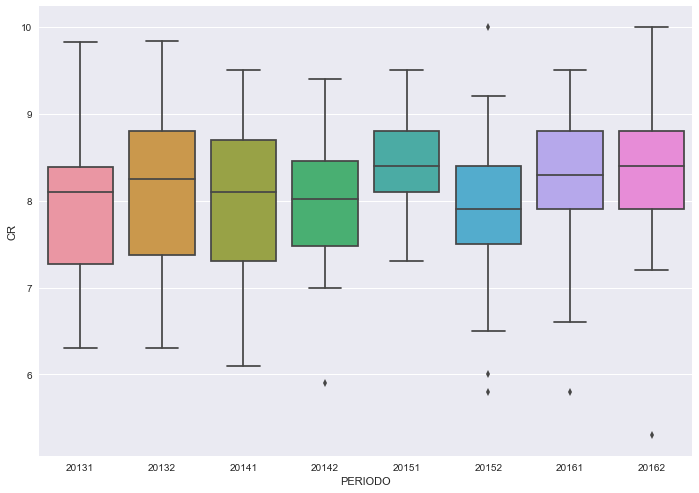

In [82]:
sbn.boxplot(dfContabeis.PERIODO, dfContabeis.CR)

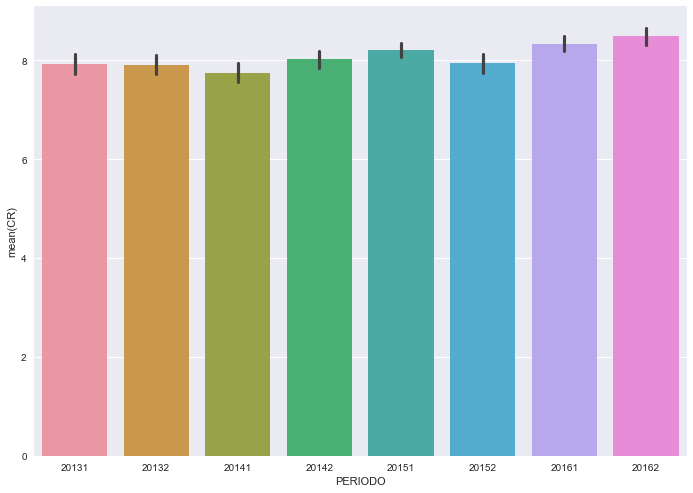

In [83]:
sbn.barplot(x='PERIODO', y='CR', data= df)

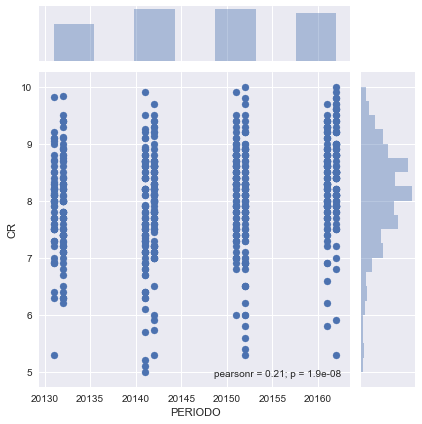

In [35]:
sbn.jointplot(x='PERIODO', y='CR', data= df)

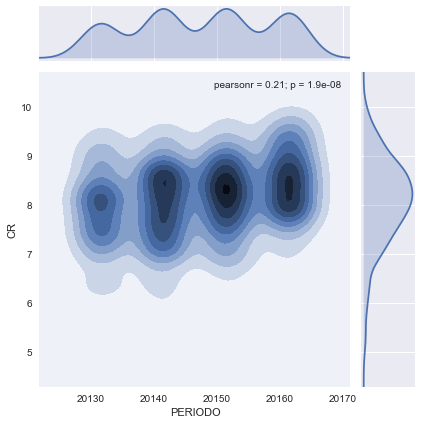

In [36]:
sbn.jointplot(x='PERIODO', y='CR', data= df, kind='kde')

In [85]:
#sbn.pairplot(df, palette='viridis')

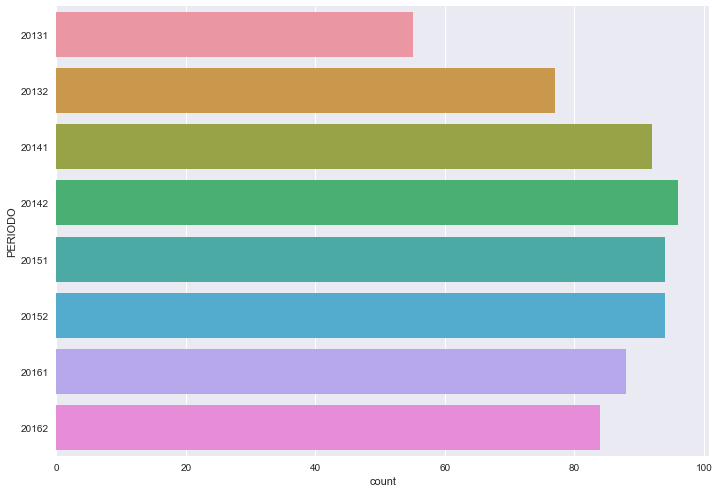

In [87]:
sbn.countplot(y='PERIODO', data=df) # usar zscore

In [91]:
# Comparação de médias: Teste de Turking
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(dfAdm.CR, dfAdm.PERIODO))


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
20131  20132  -0.1728  -0.8462 0.5006 False 
20131  20141  -0.3893  -1.0454 0.2668 False 
20131  20142   0.183   -0.4682 0.8342 False 
20131  20151   0.1842   -0.467 0.8354 False 
20131  20152   0.0903  -0.5609 0.7416 False 
20131  20161   0.4537  -0.2025 1.1098 False 
20131  20162   0.7162   0.052  1.3805  True 
20132  20141  -0.2165  -0.7972 0.3641 False 
20132  20142   0.3558  -0.2193 0.9309 False 
20132  20151   0.357   -0.2181 0.9321 False 
20132  20152   0.2631   -0.312 0.8382 False 
20132  20161   0.6264   0.0458 1.2071  True 
20132  20162   0.889    0.2992 1.4788  True 
20141  20142   0.5723   0.0176 1.1271  True 
20141  20151   0.5735   0.0188 1.1283  True 
20141  20152   0.4797  -0.0751 1.0344 False 
20141  20161   0.843    0.2825 1.4035  True 
20141  20162   1.1056   0.5356 1.6755  True 
20142  20151   0.0012  -0.5477 0.5502 False 
2014

# Próximos Passos:

* Avaliar outros cenários de testes: ANOVA, 

* Correlacionar o _violinplot_ com os indicadores sócioeconomicos*:
    * PIB
    * Orçamento do RJ
    * Orçamento da UFF
    * Orçamento da Educação no RJ
    * Inflação
    * Grandes eventos no RJ
    * Preço do Petróleo